## Ques 2:

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


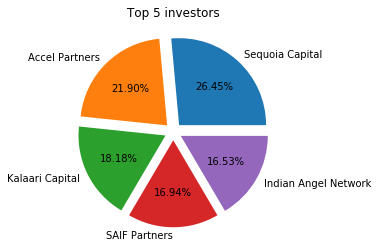

In [2]:
# problem 2:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("Datasets/startup_funding.csv",encoding="utf-8")
df=data.copy()
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investor"]
df=df[df.InvestorsName!="Undisclosed investor"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed"]

df.dropna(subset=["InvestorsName"],inplace=True)

def func1(name):
    return name.split(",")

df.InvestorsName=df.InvestorsName.apply(func1)
i_a={}
inv=np.array(df.InvestorsName)
for i in range(len(inv)):
    for j in range(len(inv[i])):
        element=inv[i][j].strip()
        if element!="":
            i_a[element]=i_a.get(element,0)+1
count=np.array(list(i_a.values()))
inv_names=np.array(list(i_a.keys()))
d=pd.DataFrame(list(i_a.values()),list(i_a.keys()))
d=d.sort_values(by=[0],ascending=False)
for i in range(5):
    print(d.index[i],d[0][i])

# plotting the pie chart:

ind=np.argsort(count)
count=count[ind][-1:-6:-1]
inv_names=inv_names[ind][-1:-6:-1]
e=[0.1,0.1,0.1,0.1,0.1]
plt.pie(count,labels=inv_names,autopct="%.2f%%",explode=e)
plt.title("Top 5 investors")
plt.show()